# Create Intermediate Raster Result

In [1]:
from datetime import datetime
import geoengine as ge
from geoengine import StoredDataset
from geoengine.colorizer import Colorizer

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030/api")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
Session Id:          c60d75c3-fb99-43ba-a0ed-91745d40a434

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                        }
                    }
                }
            })
workflow

c7b7c5c8-ee11-5418-bd1f-9e5889f6e04a

## Query raster via WMS

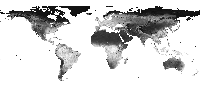

In [5]:

time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.8, 1.8)
        ),
    Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

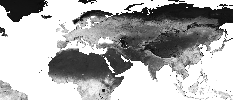

In [6]:
workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
        ),
        Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

## Store part of the world as new dataset

In [7]:
task = workflow.save_as_dataset(
    ge.api.RasterQueryRectangle({
        "spatialBounds": ge.api.SpatialPartition2D({
            "upperLeftCoordinate": {
                "x": -60.0,
                "y": 80.0},
            "lowerRightCoordinate": {
                "x": 150.0,
                "y": -10.0}
        }),
        "timeInterval": ge.api.TimeInterval({
            "start": '2014-04-01T12:00:00.000Z',
            "end": '2014-06-01T12:00:00.000Z'
        }),
        "spatialResolution": ge.api.SpatialResolution({
            "x": 0.9,
            "y": 0.9
        })
    }),
    "Part NDVI",
    "Test Description",
)
task

UUID('564ea008-a6ae-4f56-abcd-950026634ae0')

In [8]:
task_status_info = task.wait_for_finish(1)
task_status_info

TaskStatusInfo(status='completed', info={'dataset': 'c9e71290-8757-4780-96aa-5f00fdf1e94e', 'upload': '8ae3e31f-d9f1-4a71-aa0a-3306de8efc71'}, time_total='00:00:00')

In [9]:
stored_dataset = StoredDataset.from_response(task_status_info.info)
stored_dataset

StoredDataset(dataset_id=c9e71290-8757-4780-96aa-5f00fdf1e94e, upload_id=8ae3e31f-d9f1-4a71-aa0a-3306de8efc71)

In [10]:
new_workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": str(stored_dataset.dataset_id)
                        }
                    }
                }
            })
new_workflow

f858eefb-8e1c-5754-8988-135c1a64f8b1

## WMS request from new dataset

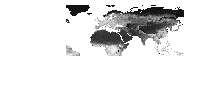

In [11]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.8, 1.8)
        ),
    Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

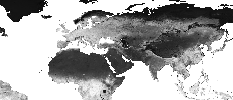

In [12]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
        ),
    Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

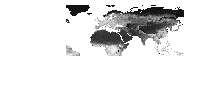

In [13]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(1.8, 1.8)
        ),
    Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

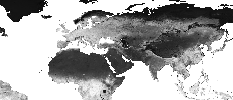

In [14]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
        ),
    Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

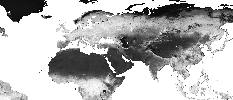

In [15]:
time = datetime.strptime(
    '2014-05-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        ge.BoundingBox2D(-60.0, -10.0, 150.0, 80.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(0.9, 0.9)
        ),
    Colorizer.linear_with_mpl_cmap(color_map="gray", min_max=(0, 255))
)

## Show layer for new dataset

In [16]:
root_collection = ge.layer_collection()
all_datasets_collection = next(filter(lambda item: item.name == 'Datasets', root_collection.items)).load()
all_part_ndvi_layers = list(filter(lambda item: item.name == 'Part NDVI', all_datasets_collection.items))
for layer in all_part_ndvi_layers:
    display(layer)

Layer
name: Part NDVI
description: Test Description
id: 36492940-f84b-4bae-ac06-96d0c181bec1
provider id: ac50ed0d-c9a0-41f8-9ce8-35fc9e38299b

Layer
name: Part NDVI
description: Test Description
id: 37adcd99-2ea5-4fb9-8fb8-8c91874f85fa
provider id: ac50ed0d-c9a0-41f8-9ce8-35fc9e38299b

Layer
name: Part NDVI
description: Test Description
id: c9e71290-8757-4780-96aa-5f00fdf1e94e
provider id: ac50ed0d-c9a0-41f8-9ce8-35fc9e38299b

## Save layer as a new dataset

In [17]:
ge.initialize("http://localhost:3030/api", admin_token='8aca8875-425a-4ef1-8ee6-cdfc62dd7525')

In [18]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
Session Id:          c60d75c3-fb99-43ba-a0ed-91745d40a434

In [19]:
layer = all_part_ndvi_layers[0].load()
layer_task = layer.save_as_dataset()
layer_task

UUID('e7756c55-b947-4ed5-a534-0067cd74786b')

In [20]:
layer_task_status_info = layer_task.wait_for_finish(1)
layer_task_status_info

TaskStatusInfo(status='completed', info={'dataset': '1db3d816-bba2-4a33-9bb4-fa272946a4a0', 'upload': 'b1acd006-768c-4202-9685-44da504ce9b2'}, time_total='00:00:00')

In [21]:
stored_layer_dataset = StoredDataset.from_response(layer_task_status_info.info)
stored_layer_dataset

StoredDataset(dataset_id=1db3d816-bba2-4a33-9bb4-fa272946a4a0, upload_id=b1acd006-768c-4202-9685-44da504ce9b2)

In [22]:
root_collection = ge.layer_collection()
all_datasets_collection = next(filter(lambda item: item.name == 'Datasets', root_collection.items)).load()
all_part_ndvi_layers = list(filter(lambda item: item.name == 'Part NDVI', all_datasets_collection.items))
for layer in all_part_ndvi_layers:
    display(layer)

Layer
name: Part NDVI
description: Test Description
id: 36492940-f84b-4bae-ac06-96d0c181bec1
provider id: ac50ed0d-c9a0-41f8-9ce8-35fc9e38299b

Layer
name: Part NDVI
description: Test Description
id: 37adcd99-2ea5-4fb9-8fb8-8c91874f85fa
provider id: ac50ed0d-c9a0-41f8-9ce8-35fc9e38299b

Layer
name: Part NDVI
description: Test Description
id: c9e71290-8757-4780-96aa-5f00fdf1e94e
provider id: ac50ed0d-c9a0-41f8-9ce8-35fc9e38299b

Layer
name: Part NDVI
description: Test Description
id: 1db3d816-bba2-4a33-9bb4-fa272946a4a0
provider id: ac50ed0d-c9a0-41f8-9ce8-35fc9e38299b